<a href="https://colab.research.google.com/github/Tsegaye-misikir/Tsegaye-misikir.github.io/blob/master/EFOP_complaints_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
complains_path="/content/drive/My Drive/efop_dataset/complaints_users.csv"

In [0]:
df = pd.read_csv(complains_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE,PRODUCT_ID,ISSUE_ID
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165


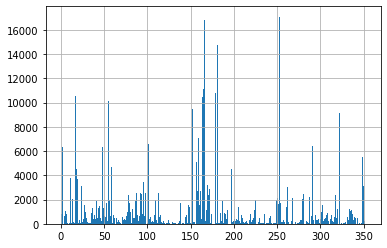

In [0]:
df['ISSUE_ID'].hist(bins=353)

In [0]:
reps = df.pivot_table(index=['ISSUE_ID'], aggfunc='size')

In [0]:
print("Number of complaints is:", len(df))
print("Number of issues is:", len(reps))
print("Most occured issue is:",np.argmax(reps), "which occured:",np.max(reps),"times")
print("Least occured issue is:",np.argmin(reps), "which occured:",np.min(reps),"times")

Number of complaints is: 383066
Number of issues is: 353
Most occured issue is: 253 which occured: 17094 times
Least occured issue is: 175 which occured: 1 times


In [0]:
print("average occurence for an issue is:",np.average(reps),"times")

average occurence for an issue is: 1085.1728045325779 times


In [0]:
avg_ocur = np.average(reps)
upavg = reps > avg_ocur
doavg = reps < avg_ocur
print("issues occured more than average ", upavg.sum())
print("issues occured less than average ", doavg.sum())

issues occured more than average  86
issues occured less than average  267


In [0]:
val = 100
outliers = reps < val
print("outliers issue that occured less than ", val,"times are", outliers.sum())

outliers issue that occured less than  100 times are 109


In [0]:
val = 5000
summ = 0
numm = 0
for rep in reps:
  if rep <= val:
    numm+=1
    summ+=rep
print("Number of issue ids that occured less than", val, "times are", numm)
print("Number of complaints with these issue id are", summ, "which is ",100* summ/np.sum(reps),"%")
print("Number of issue ids that occured more than", val, "times are", len(reps) - numm)
print("Number of complaints with these issue id are", np.sum(reps) - summ, "which is ",100 - 100* summ/np.sum(reps),"%")

Number of issue ids that occured less than 5000 times are 335
Number of complaints with these issue id are 213758 which is  55.80187226222113 %
Number of issue ids that occured more than 5000 times are 18
Number of complaints with these issue id are 169308 which is  44.19812773777887 %


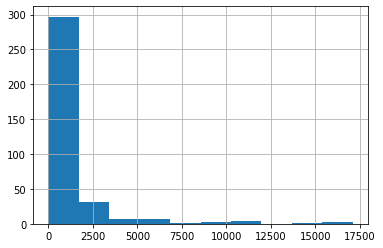

In [0]:
reps.hist()

In [0]:
compliants_lengths = df['COMPLAINT_TEXT'].apply(len)

In [0]:
print("Number of complaints is:", len(df))
print("Longest complaints is: ",np.max(compliants_lengths))
print("shorttest complaints is: ",np.min(compliants_lengths))
print("average complaints is: ",np.average(compliants_lengths))

Number of complaints is: 383066
Longest complaints is:  31735
shorttest complaints is:  5
average complaints is:  1082.0081944103626


In [0]:
trainable_data = df[['ISSUE_ID', 'COMPLAINT_TEXT']]

In [0]:
len(trainable_data)

383066

In [0]:
len(trainable_data.dropna())

383066

In [0]:
val = 100
outliers = reps < val
maj_class_data = trainable_data.copy()
ind = 1
ind_map = {}
for index, row in maj_class_data.iterrows():
  if outliers[row['ISSUE_ID']]:
    maj_class_data.at[index, 'ISSUE_ID'] = 0
  elif row['ISSUE_ID'] in ind_map:
    maj_class_data.at[index, 'ISSUE_ID'] = ind_map[row['ISSUE_ID']]
  else:
    ind_map[row['ISSUE_ID']] = ind
    maj_class_data.at[index, 'ISSUE_ID'] = ind
    ind += 1


In [0]:
trainable_data.head()

,ISSUE_ID,COMPLAINT_TEXT
0,253,XXXX and Transunion are reporting incorrectly...
1,253,XXXX and Transunion are reporting incorrectly ...
2,165,"XXXX, XXXX, and Experian need to remove the co..."
3,253,"3 company with inconsistencies, violations and..."
4,165,I have a personal loan from Patriot finance. T...


In [0]:
maj_class_data.head()

,ISSUE_ID,COMPLAINT_TEXT
0,1,XXXX and Transunion are reporting incorrectly...
1,1,XXXX and Transunion are reporting incorrectly ...
2,2,"XXXX, XXXX, and Experian need to remove the co..."
3,1,"3 company with inconsistencies, violations and..."
4,2,I have a personal loan from Patriot finance. T...


In [0]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Here we are going to try out the traditional ways of text classification.

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
XX_RE = re.compile('X\w*')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = XX_RE.sub('', text)
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
    
maj_class_data['COMPLAINT_TEXT'] = maj_class_data['COMPLAINT_TEXT'].apply(clean_text)


In [0]:
maj_class_data['COMPLAINT_TEXT'].apply(lambda x: len(x.split(' '))).sum()

33981834

In [0]:
X = maj_class_data['COMPLAINT_TEXT']
y = maj_class_data['ISSUE_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Naive Bayes Classifier**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.17000522102332058


**Linear Support Vector Machine**

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.313783501566307


**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.3580316742081448


**Word2vec and Logistic Regression**

In [0]:
import gensim 
from gensim.models import Word2Vec

wv_path = "/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz"
wv = gensim.models.KeyedVectors.load_word2vec_format(wv_path, binary=True)
wv.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [0]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(maj_class_data, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['COMPLAINT_TEXT']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['COMPLAINT_TEXT']), axis=1).values

In [0]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['ISSUE_ID'])
y_pred = logreg.predict(X_test_word_average)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.metrics import accuracy_score
print('accuracy %s' % accuracy_score(y_pred, test['ISSUE_ID']))

NameError: ignored

**Doc2vec and Logistic Regression**

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec
import re

def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(maj_class_data['COMPLAINT_TEXT'], maj_class_data['ISSUE_ID'], random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 383066/383066 [00:00<00:00, 3138168.61it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Neural Network**

In [0]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras import utils

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(maj_class_data['COMPLAINT_TEXT'], maj_class_data['ISSUE_ID'], random_state=0, test_size=0.3)

In [0]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(X_train)
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
  if word in wv.vocab:
    embedding_vector = wv.syn0norm[wv.vocab[word].index]
  else:
    embedding_vector = np.zeros(300,)
  embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  


In [0]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
# y_test = utils.to_categorical(y_test, num_classes)

In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    predictions = predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions, y_test)

**CNN**

In [0]:
def create_cnn():
    input_layer = layers.Input((32, ))
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(num_classes, activation="sigmoid")(output_layer1)
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, y_train, valid_seq_x)
print("CNN, Word Embeddings",  accuracy)

Epoch 1/1
268146/268146 [==============================] - 50s 187us/step - loss: 3.5974 - accuracy: 0.1698
CNN, Word Embeddings 0.23361468847894187


**LSTM**

In [0]:
def create_rnn_lstm():
    input_layer = layers.Input((32, ))
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    lstm_layer = layers.LSTM(100)(embedding_layer)
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(num_classes, activation="sigmoid")(output_layer1)
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, y_train, valid_seq_x)
print("RNN-LSTM, Word Embeddings",  accuracy)

Epoch 1/1
268146/268146 [==============================] - 1212s 5ms/step - loss: 3.9597 - accuracy: 0.1229
RNN-LSTM, Word Embeddings 0.1995910198398886


**GRU**

In [0]:
def create_rnn_gru():
    input_layer = layers.Input((32, ))
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    lstm_layer = layers.GRU(100)(embedding_layer)
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(num_classes, activation="sigmoid")(output_layer1)
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, y_train, valid_seq_x)
print("RNN-GRU, Word Embeddings",  accuracy)

Epoch 1/1
268146/268146 [==============================] - 1550s 6ms/step - loss: 3.7316 - accuracy: 0.1484
RNN-GRU, Word Embeddings 0.22293769578837452


**Bidrectional RNN**

In [0]:
def create_bidirectional_rnn():
    input_layer = layers.Input((32, ))
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(num_classes, activation="sigmoid")(output_layer1)
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, y_train, valid_seq_x)
print("RNN-Bidirectional, Word Embeddings",  accuracy)

Epoch 1/1
268146/268146 [==============================] - 2981s 11ms/step - loss: 3.7036 - accuracy: 0.1532
RNN-Bidirectional, Word Embeddings 0.22588757396449705


**Recurrent CNN**

In [0]:
def create_rcnn():
    input_layer = layers.Input((32, ))
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(num_classes, activation="sigmoid")(output_layer1)
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, y_train, valid_seq_x)
print("CNN, Word Embeddings",  accuracy)

Epoch 1/1
268146/268146 [==============================] - 46s 171us/step - loss: 3.5795 - accuracy: 0.1696
CNN, Word Embeddings 0.23406717716672468


**BERT**

In [0]:
!pip install tensorflow-gpu
!pip install --upgrade grpcio >> /dev/null
!pip install tqdm  >> /dev/null
!pip install bert-for-tf2 >> /dev/null
!pip install sentencepiece >> /dev/null
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip

In [0]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.makedirs("model", exist_ok=True)

In [0]:
!mv uncased_L-12_H-768_A-12/ model

In [0]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [0]:
class IntentDetectionData:
  DATA_COLUMN = "COMPLAINT_TEXT"
  LABEL_COLUMN = "ISSUE_ID"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    train, test = map(lambda df: df.reindex(df[IntentDetectionData.DATA_COLUMN].str.len().sort_values().index), [train, test])
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [0]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))


In [0]:
tokenizer.tokenize("I can't wait to visit Bulgaria again!")


['i', 'can', "'", 't', 'wait', 'to', 'visit', 'bulgaria', 'again', '!']

In [0]:

def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

In [0]:
train, test = train_test_split(maj_class_data, random_state=0, test_size=0.3)

In [0]:

classes = train.ISSUE_ID.unique().tolist()

data = IntentDetectionData(train, test, tokenizer, classes, max_seq_len=128)

268146it [09:10, 487.10it/s]
114920it [03:53, 492.54it/s]


max seq_len 5036


In [0]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 128, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7fa9f75dbd68> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 245)               188405

In [0]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [0]:
history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.1,
  batch_size=16,
  shuffle=True,
  epochs=5
)

Epoch 1/5
15084/15084 [==============================] - 5673s 376ms/step - loss: 5.4616 - acc: 0.0464 - val_loss: 5.4842 - val_acc: 0.0240
Epoch 2/5
15084/15084 [==============================] - 5668s 376ms/step - loss: 5.4614 - acc: 0.0464 - val_loss: 5.4842 - val_acc: 0.0240
Epoch 3/5
15084/15084 [==============================] - 5673s 376ms/step - loss: 5.4614 - acc: 0.0464 - val_loss: 5.4842 - val_acc: 0.0240
Epoch 4/5
15084/15084 [==============================] - 5681s 377ms/step - loss: 5.4614 - acc: 0.0464 - val_loss: 5.4842 - val_acc: 0.0240
Epoch 5/5
15084/15084 [==============================] - 5667s 376ms/step - loss: 5.4614 - acc: 0.0464 - val_loss: 5.4842 - val_acc: 0.0240


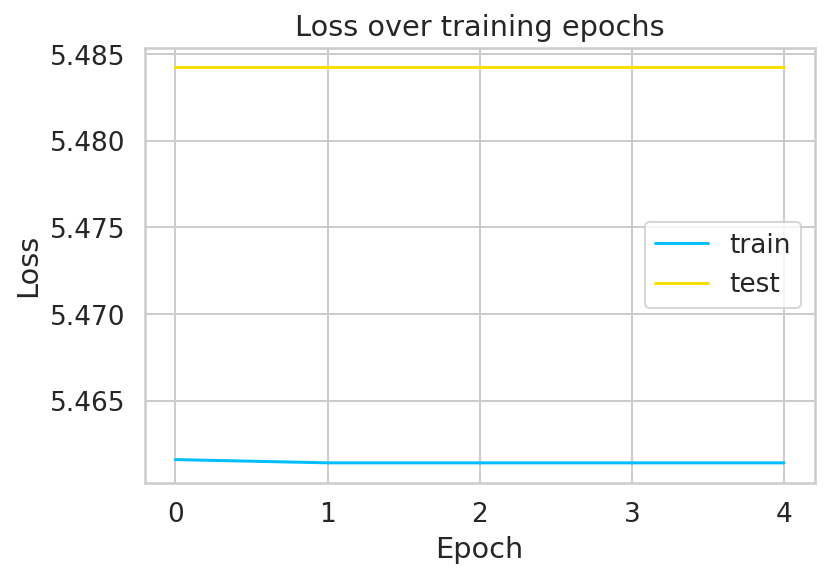

In [0]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

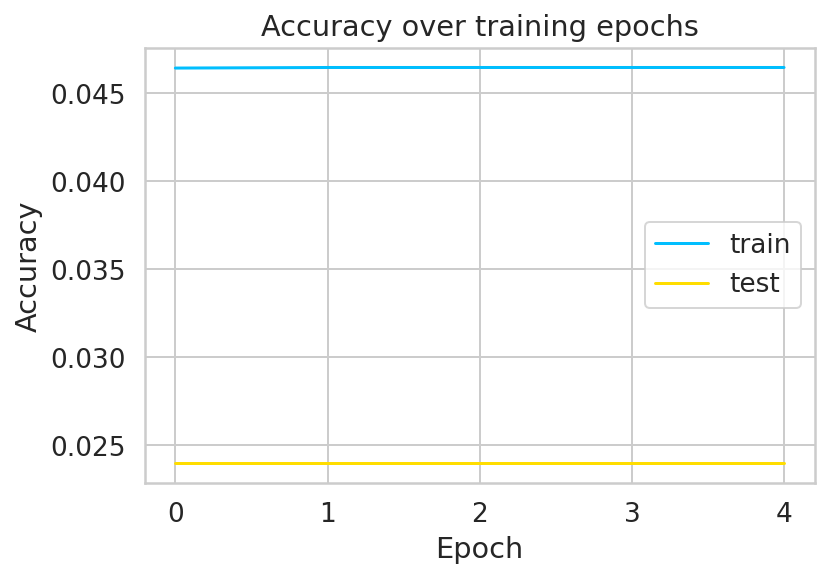

In [0]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [0]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

3592/3592 [==============================] - 647s 180ms/step - loss: 5.4645 - acc: 0.0435
train acc 0.04420353099703789
test acc 0.04350852593779564
